In [8]:
import numpy as np
import seaborn as sn

import pandas as pd

from sklearn.feature_extraction import DictVectorizer

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import glob, os

In [9]:


# path = r'eviction data/data/ACS income' # use your path
# all_files = glob.glob(path + "/*.csv")

all_files = ['ACS income 2010','ACS income 2011','ACS income 2012', 'ACS income 2013','ACS income 2014','ACS income 2015',
            'ACS income 2016', 'ACS income 2017', 'ACS income 2018']

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

econ = pd.concat(li, axis=0, ignore_index=True)

In [10]:
econ

,GEO_ID,NAME,DP03_0001E,DP03_0001M,DP03_0001PE,DP03_0001PM,DP03_0002E,DP03_0002M,DP03_0002PE,DP03_0002PM,...,DP03_0135PE,DP03_0135PM,DP03_0136E,DP03_0136M,DP03_0136PE,DP03_0136PM,DP03_0137E,DP03_0137M,DP03_0137PE,DP03_0137PM
0,id,Geographic Area Name,Estimate!!EMPLOYMENT STATUS!!Population 16 yea...,Estimate Margin of Error!!EMPLOYMENT STATUS!!P...,Percent!!EMPLOYMENT STATUS!!Population 16 year...,Percent Margin of Error!!EMPLOYMENT STATUS!!Po...,Estimate!!EMPLOYMENT STATUS!!In labor force,Estimate Margin of Error!!EMPLOYMENT STATUS!!I...,Percent!!EMPLOYMENT STATUS!!In labor force,Percent Margin of Error!!EMPLOYMENT STATUS!!In...,...,Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHO...,Percent Margin of Error!!PERCENTAGE OF FAMILIE...,Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WH...,Estimate Margin of Error!!PERCENTAGE OF FAMILI...,Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHO...,Percent Margin of Error!!PERCENTAGE OF FAMILIE...,Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WH...,Estimate Margin of Error!!PERCENTAGE OF FAMILI...,Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHO...,Percent Margin of Error!!PERCENTAGE OF FAMILIE...
1,0400000US34,New Jersey,6893087,1833,6893087,(X),4596702,7992,66.7,0.1,...,7.9,0.2,(X),(X),7.2,0.1,(X),(X),19.0,0.3
2,1600000US3457000,"Paterson city, New Jersey",110209,1042,110209,(X),64531,1653,58.6,1.4,...,25.4,3.2,(X),(X),25.0,2.1,(X),(X),35.2,2.6
3,id,Geographic Area Name,Estimate!!EMPLOYMENT STATUS!!Population 16 yea...,Margin of Error!!EMPLOYMENT STATUS!!Population...,Percent!!EMPLOYMENT STATUS!!Population 16 year...,Percent Margin of Error!!EMPLOYMENT STATUS!!Po...,Estimate!!EMPLOYMENT STATUS!!In labor force,Margin of Error!!EMPLOYMENT STATUS!!In labor f...,Percent!!EMPLOYMENT STATUS!!In labor force,Percent Margin of Error!!EMPLOYMENT STATUS!!In...,...,Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHO...,Percent Margin of Error!!PERCENTAGE OF FAMILIE...,Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WH...,Margin of Error!!PERCENTAGE OF FAMILIES AND PE...,Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHO...,Percent Margin of Error!!PERCENTAGE OF FAMILIE...,Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WH...,Margin of Error!!PERCENTAGE OF FAMILIES AND PE...,Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHO...,Percent Margin of Error!!PERCENTAGE OF FAMILIE...
4,0400000US34,New Jersey,6935191,1841,6935191,(X),4633565,7202,66.8,0.1,...,7.7,0.2,(X),(X),7.5,0.1,(X),(X),19.2,0.3
5,1600000US3457000,"Paterson city, New Jersey",110025,908,110025,(X),62884,1571,57.2,1.4,...,26.6,3.3,(X),(X),25.3,1.6,(X),(X),38.3,2.6
6,id,Geographic Area Name,Estimate!!EMPLOYMENT STATUS!!Population 16 yea...,Margin of Error!!EMPLOYMENT STATUS!!Population...,Percent!!EMPLOYMENT STATUS!!Population 16 year...,Percent Margin of Error!!EMPLOYMENT STATUS!!Po...,Estimate!!EMPLOYMENT STATUS!!In labor force,Margin of Error!!EMPLOYMENT STATUS!!In labor f...,Percent!!EMPLOYMENT STATUS!!In labor force,Percent Margin of Error!!EMPLOYMENT STATUS!!In...,...,Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHO...,Percent Margin of Error!!PERCENTAGE OF FAMILIE...,Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WH...,Margin of Error!!PERCENTAGE OF FAMILIES AND PE...,Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHO...,Percent Margin of Error!!PERCENTAGE OF FAMILIE...,Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WH...,Margin of Error!!PERCENTAGE OF FAMILIES AND PE...,Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHO...,Percent Margin of Error!!PERCENTAGE OF FAMILIE...
7,0400000US34,New Jersey,6985329,1995,6985329,(X),4672338,7507,66.9,0.1,...,7.8,0.2,(X),(X),8.0,0.1,(X),(X),19.7,0.2
8,1600000US3457000,"Paterson city, New Jersey",109806,958,109806,(X),63086,1375,57.5,1.2,...,25.8,3.1,(X),(X),26.2,2.0,(X),(X),36.5,2.8
9,id,Geographic Area Name,Estimate!!EMPLOYMENT STATUS!!Population 16 yea...,Margin of Error!!EMPLOYMENT STATUS!!Population...,Percent!!EMPLOYMENT STATUS!!Population 16 year...,Percent Margin of Error!!EMPLOYMENT STATUS!!Po...,Estimate!!EMPLOYMENT STATUS!!Populatio

In [11]:
paterson = econ.loc[econ['NAME']=='Paterson city, New Jersey' ]

In [12]:
paterson.index = range(2010,2019,1)
paterson

,GEO_ID,NAME,DP03_0001E,DP03_0001M,DP03_0001PE,DP03_0001PM,DP03_0002E,DP03_0002M,DP03_0002PE,DP03_0002PM,...,DP03_0135PE,DP03_0135PM,DP03_0136E,DP03_0136M,DP03_0136PE,DP03_0136PM,DP03_0137E,DP03_0137M,DP03_0137PE,DP03_0137PM
2010,1600000US3457000,"Paterson city, New Jersey",110209,1042,110209,(X),64531,1653,58.6,1.4,...,25.4,3.2,(X),(X),25.0,2.1,(X),(X),35.2,2.6
2011,1600000US3457000,"Paterson city, New Jersey",110025,908,110025,(X),62884,1571,57.2,1.4,...,26.6,3.3,(X),(X),25.3,1.6,(X),(X),38.3,2.6
2012,1600000US3457000,"Paterson city, New Jersey",109806,958,109806,(X),63086,1375,57.5,1.2,...,25.8,3.1,(X),(X),26.2,2.0,(X),(X),36.5,2.8
2013,1600000US3457000,"Paterson city, New Jersey",110537,1152,110537,(X),62853,1326,56.9,1.0,...,23.8,2.6,(X),(X),27.7,2.1,(X),(X),38.0,2.7
2014,1600000US3457000,"Paterson city, New Jersey",110949,913,110949,(X),63517,1425,57.2,1.2,...,24.5,2.5,(X),(X),26.6,1.7,(X),(X),40.0,3.1
2015,1600000US3457000,"Paterson city, New Jersey",111527,953,111527,(X),63002,1408,56.5,1.2,...,24.8,2.3,(X),(X),27.3,1.7,(X),(X),41.1,2.7
2016,1600000US3457000,"Paterson city, New Jersey",112002,1049,112002,(X),63890,1213,57.0,1.0,...,25.5,2.8,(X),(X),27.0,1.8,(X),(X),41.3,2.9
2017,1600000US3457000,"Paterson city, New Jersey",113260,897,113260,(X),65174,1375,57.5,1.1,...,26.1,2.6,(X),(X),26.8,1.6,(X),(X),42.5,2.6
2018,1600000US3457000,"Paterson city, New Jersey",110820,867,110820,(X),64823,1342,58.5,1.1,...,27.2,3.0,(X),(X),25.7,1.7,(X),(X),42.2,2.8


In [13]:
paterson = paterson.iloc[:,2:551]
paterson

,DP03_0001E,DP03_0001M,DP03_0001PE,DP03_0001PM,DP03_0002E,DP03_0002M,DP03_0002PE,DP03_0002PM,DP03_0003E,DP03_0003M,...,DP03_0135PE,DP03_0135PM,DP03_0136E,DP03_0136M,DP03_0136PE,DP03_0136PM,DP03_0137E,DP03_0137M,DP03_0137PE,DP03_0137PM
2010,110209,1042,110209,(X),64531,1653,58.6,1.4,64496,1650,...,25.4,3.2,(X),(X),25.0,2.1,(X),(X),35.2,2.6
2011,110025,908,110025,(X),62884,1571,57.2,1.4,62848,1566,...,26.6,3.3,(X),(X),25.3,1.6,(X),(X),38.3,2.6
2012,109806,958,109806,(X),63086,1375,57.5,1.2,63035,1386,...,25.8,3.1,(X),(X),26.2,2.0,(X),(X),36.5,2.8
2013,110537,1152,110537,(X),62853,1326,56.9,1.0,62819,1329,...,23.8,2.6,(X),(X),27.7,2.1,(X),(X),38.0,2.7
2014,110949,913,110949,(X),63517,1425,57.2,1.2,63517,1425,...,24.5,2.5,(X),(X),26.6,1.7,(X),(X),40.0,3.1
2015,111527,953,111527,(X),63002,1408,56.5,1.2,63002,1408,...,24.8,2.3,(X),(X),27.3,1.7,(X),(X),41.1,2.7
2016,112002,1049,112002,(X),63890,1213,57.0,1.0,63874,1215,...,25.5,2.8,(X),(X),27.0,1.8,(X),(X),41.3,2.9
2017,113260,897,113260,(X),65174,1375,57.5,1.1,65159,1378,...,26.1,2.6,(X),(X),26.8,1.6,(X),(X),42.5,2.6
2018,110820,867,110820,(X),64823,1342,58.5,1.1,64791,1341,...,27.2,3.0,(X),(X),25.7,1.7,(X),(X),42.2,2.8


In [14]:
paterson.columns

Index(['DP03_0001E', 'DP03_0001M', 'DP03_0001PE', 'DP03_0001PM', 'DP03_0002E',
       'DP03_0002M', 'DP03_0002PE', 'DP03_0002PM', 'DP03_0003E', 'DP03_0003M',
       ...
       'DP03_0135PE', 'DP03_0135PM', 'DP03_0136E', 'DP03_0136M', 'DP03_0136PE',
       'DP03_0136PM', 'DP03_0137E', 'DP03_0137M', 'DP03_0137PE',
       'DP03_0137PM'],
      dtype='object', length=548)

In [15]:
# DP03_0135PE: 
    
#     Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE 
#     INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY 
#     LEVEL!!18 years and over!!65 years and over
    
    
# DP03_0134PE

# Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 
# 12 MONTHS IS BELOW THE POVERTY LEVEL!!18 years and over!!18 to 64 years


# DP03_0133PE

# Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 
# 12 MONTHS IS BELOW THE POVERTY LEVEL!!18 years and over
    
    
# DP03_0132PE

#     Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 
# 12 MONTHS IS BELOW THE POVERTY LEVEL!!Under 18 years!
#     !Related children under 18 years!!Related children 5 to 17 years



# DP03_0131PE

# Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME 
# IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!Under 18 years!
# !Related children under 18 years!!Related children under 5 years


#DP03_0128PE

# Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE 
# PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people


# DP03_0127PE

# Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY 
# LEVEL!!Families with female householder, 
# no husband present!!With related children 
# under 18 years!!With related children under 5 years only


# DP03_0126PE

# Percent!!PERCENTAGE OF FAMILIES 
# AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS 
# IS BELOW THE POVERTY LEVEL!!Families with female householder,
# no husband present!!With related children under 18 years


# DP03_0125PM

# Percent Margin of Error!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN 
# THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!
# !Families with female householder, no husband present


# DP03_0121PE

# Estimate Margin of Error!!PERCENTAGE OF FAMILIES AND PEOPLE 
# WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!
# All families!!With related children under 18 years!!With related 
 # children under 5 years only
    
    
# DP03_0119PE

# Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE P
# AST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All families



# DP03_0118PE

# Percent!!HEALTH INSURANCE COVERAGE!!
# Not in labor force!!No health insurance coverage


# DP03_0113PE

# Percent!!HEALTH INSURANCE COVERAGE!!
# In labor force!!Unemployed!!No health insurance coverage

# DP03_0110PE

# Percent!!HEALTH INSURANCE COVERAGE!!In labor force!
# !Unemployed!!With health insurance coverage

# DP03_0101PE
# Percent!!HEALTH INSURANCE COVERAGE!!No health insurance coverage

# DP03_0070PE

# Percent Margin of Error!!INCOME AND BENEFITS 
# (IN 2010 INFLATION-ADJUSTED DOLLARS)!!With Supplemental Security Income


# DP03_0052PE

# Percent!!INCOME AND BENEFITS 
# (IN 2010 INFLATION-ADJUSTED DOLLARS)!!Less than $10,000

# DP03_0053PE

#Percent!!INCOME AND BENEFITS 
# (IN 2010 INFLATION-ADJUSTED DOLLARS)!!$10,000 to $14,999


# DP03_0054PE
# Percent!!INCOME AND BENEFITS 
# (IN 2010 INFLATION-ADJUSTED DOLLARS)!!$15,000 to $24,999

# DP03_0055PE
#percent!!INCOME AND BENEFITS 
# (IN 2010 INFLATION-ADJUSTED DOLLARS)!!$25,000 to $34,999

# DP03_0056PE
# Percent!!INCOME AND BENEFITS 
# (IN 2010 INFLATION-ADJUSTED DOLLARS)!!$35,000 to $49,999

# DP03_0050PE
# Percent!!CLASS OF WORKER!!Unpaid family workers

# DP03_0049PE
# Percent!!CLASS OF WORKER!!
# Self-employed in own not incorporated business workers
    

In [18]:
pct_families_below_poverty = paterson[['DP03_0135PE', 'DP03_0134PE', 'DP03_0133PE','DP03_0132PE','DP03_0131PE',
         'DP03_0128PE','DP03_0121PE','DP03_0119PE']]
pct_families_below_poverty 
# = pct_families_below_poverty.reset_index()
# pct_families_below_poverty

,DP03_0135PE,DP03_0134PE,DP03_0133PE,DP03_0132PE,DP03_0131PE,DP03_0128PE,DP03_0121PE,DP03_0119PE
2010,25.4,21.4,21.9,38.0,40.6,26.6,28.3,24.1
2011,26.6,22.3,22.8,36.8,40.8,27.1,33.2,24.6
2012,25.8,22.5,22.9,38.6,42.1,27.6,34.9,25.2
2013,23.8,24.2,24.1,41.0,44.6,29.1,34.3,26.8
2014,24.5,24.2,24.3,37.5,43.6,28.4,36.3,26.1
2015,24.8,24.8,24.8,39.5,43.0,29.1,39.6,27.1
2016,25.5,24.9,25.0,39.5,41.6,29.1,39.1,27.1
2017,26.1,24.7,24.9,38.6,44.0,29.0,43.5,27.1
2018,27.2,24.0,24.5,36.4,41.5,28.1,41.7,25.5


In [19]:
pct_families_below_poverty.columns.name = 'attributes'

In [20]:
# pct_families_below_poverty.index.name = 'year'


In [21]:
# pct_families_below_poverty = pct_families_below_poverty.reset_index()
# pct_families_below_poverty

In [23]:
pct_families_below_poverty = pct_families_below_poverty.astype(float)

In [24]:
attributes = ['65 yrs and over', '18 to 64 yrs', '18 yrs and over',
             'related children 5 - 17 yrs', 'under 5 yrs', 'all ppl', 'children under 18 yrs', 'all families']




In [25]:
from matplotlib.pyplot import figure
from matplotlib import pyplot as plt


Text(0.5, 1.0, 'PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL')

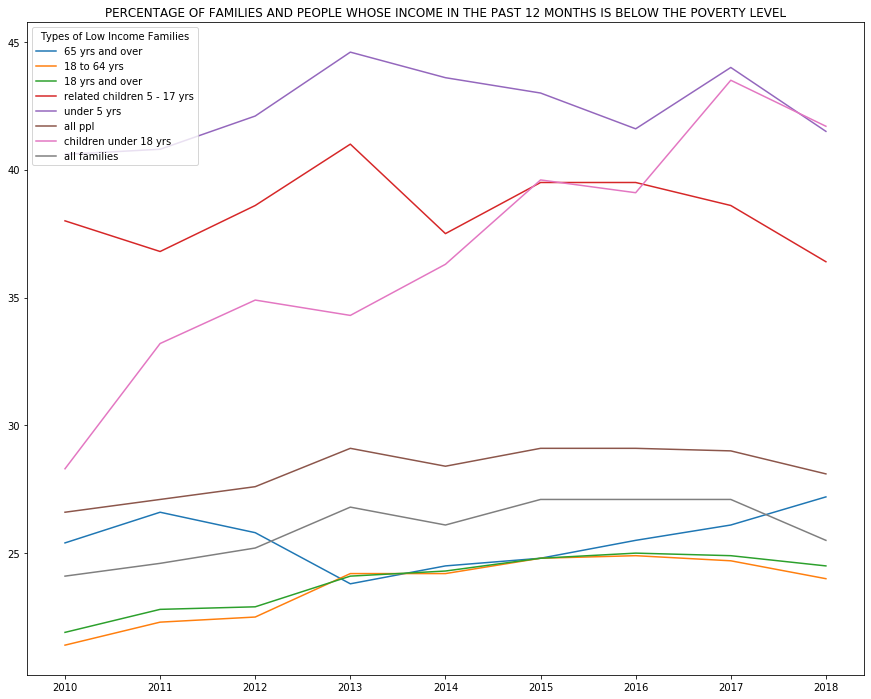

In [34]:
plt.figure(figsize=(15,12))

g = sns.lineplot(data=pct_families_below_poverty, dashes=False)
plt.legend(title='Types of Low Income Families', loc='upper left', labels=attributes)

plt.title('PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL')

Text(0.5, 1.0, 'PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL FAMILIES WITH FEMALE HOUSEHOLDER')

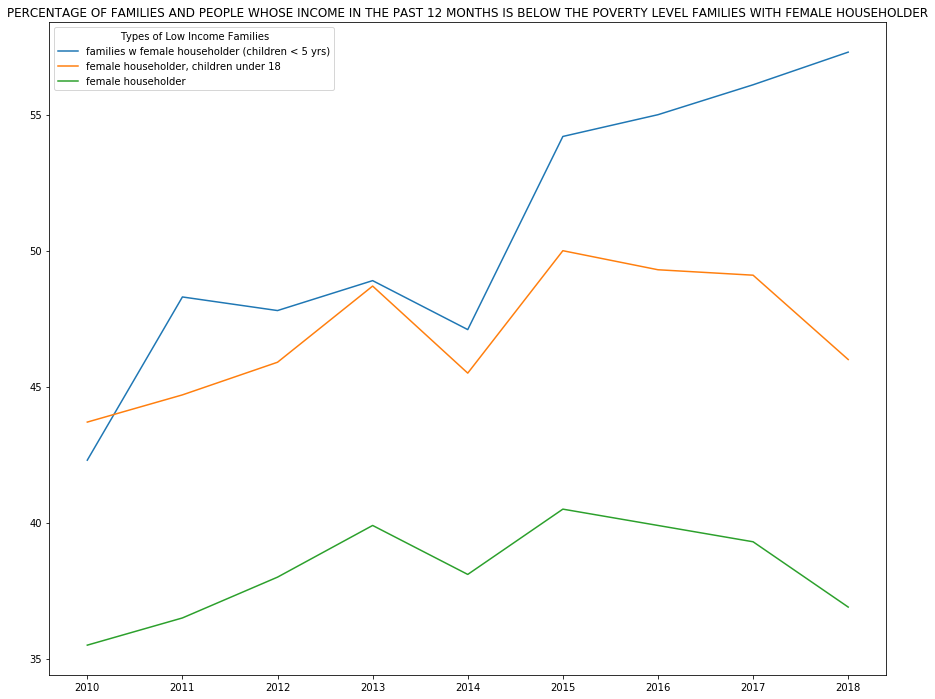

In [33]:
att = ['families w female householder (children < 5 yrs)',
             'female householder, children under 18','female householder']
pct_female_household = paterson[['DP03_0127PE','DP03_0126PE','DP03_0125PE']].astype(float)

plt.figure(figsize=(15,12))

g = sns.lineplot(data= pct_female_household, dashes=False)
plt.legend(title='Types of Low Income Families', loc='upper left', labels=att)

plt.title('PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL FAMILIES WITH FEMALE HOUSEHOLDER')


In [28]:
paterson[['DP03_0118PE', 'DP03_0113PE', 'DP03_0110PE', 'DP03_0101PE']].iloc[2:9, :]

,DP03_0118PE,DP03_0113PE,DP03_0110PE,DP03_0101PE
2012,35.9,52.3,47.7,8.4
2013,33.7,51.6,48.4,8.4
2014,31.4,49.5,50.5,7.5
2015,30.1,46.0,54.0,6.5
2016,27.6,43.9,56.1,5.3
2017,26.1,42.9,57.1,6.2
2018,24.7,38.0,62.0,6.8


Text(0.5, 1.0, 'Trend of % of People(Unemployed or Employed) with No Health Insurance')

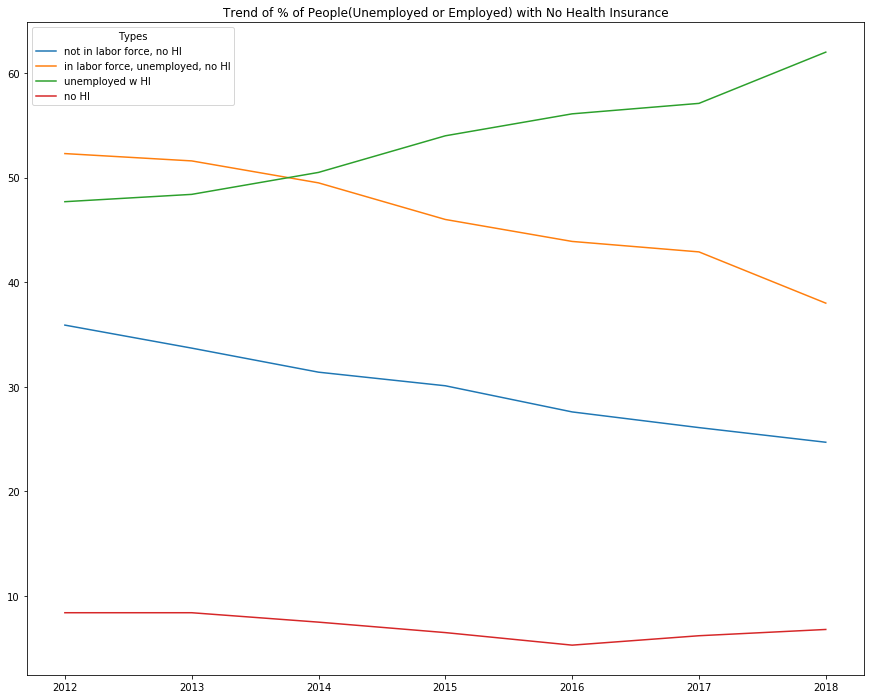

In [31]:
attr = ['not in labor force, no HI',
            'in labor force, unemployed, no HI','unemployed w HI', 'no HI']

no_health_insurance = paterson[['DP03_0118PE', 'DP03_0113PE', 'DP03_0110PE', 'DP03_0101PE']].iloc[2:9, :]

no_health_insurance = no_health_insurance.astype(float)


plt.figure(figsize=(15,12))

g = sns.lineplot(data= no_health_insurance, dashes=False)
plt.legend(title='Types', loc='upper left', labels=attr)
plt.title('Trend of % of People(Unemployed or Employed) with No Health Insurance')

Text(0.5, 1.0, '% of income ')

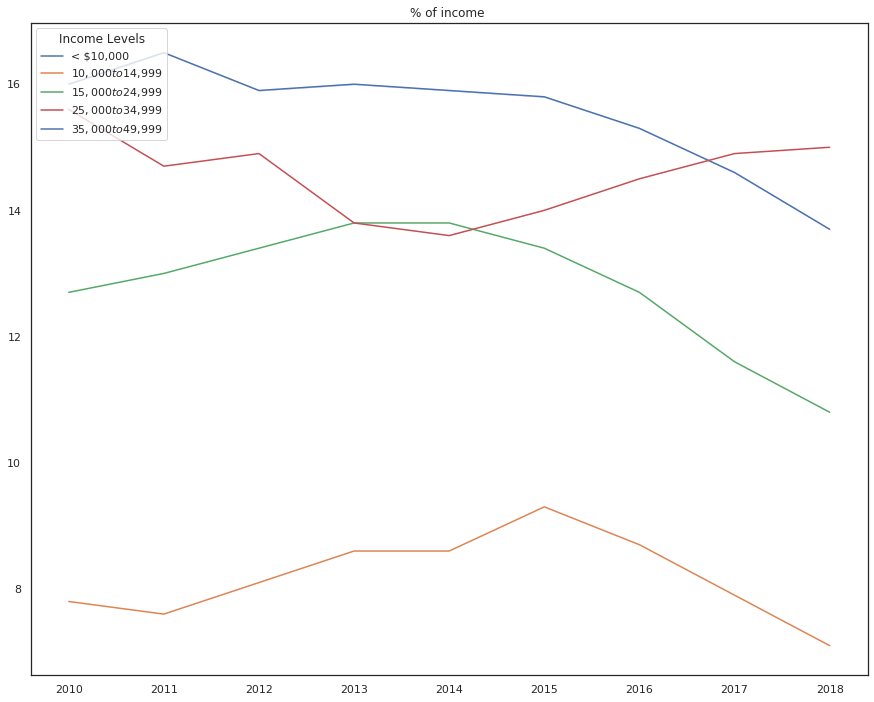

In [46]:
income = paterson[['DP03_0052PE', 'DP03_0053PE', 'DP03_0052PE', 'DP03_0055PE', 'DP03_0056PE']]

attr = ['< $10,000','$10,000 to $14,999','$15,000 to $24,999', '$25,000 to $34,999', '$35,000 to $49,999']


income = income.astype(float)

plt.figure(figsize=(15,12))

g = sns.lineplot(data= income, dashes=False)
plt.legend(title='Income Levels', loc='upper left', labels=attr)
plt.title('% of income ')

In [ ]:
# DP03_0052PE

# Percent!!INCOME AND BENEFITS 
# (IN 2010 INFLATION-ADJUSTED DOLLARS)!!Less than $10,000

# DP03_0053PE

#Percent!!INCOME AND BENEFITS 
# (IN 2010 INFLATION-ADJUSTED DOLLARS)!!$10,000 to $14,999


# DP03_0054PE
# Percent!!INCOME AND BENEFITS 
# (IN 2010 INFLATION-ADJUSTED DOLLARS)!!$15,000 to $24,999

# DP03_0055PE
#percent!!INCOME AND BENEFITS 
# (IN 2010 INFLATION-ADJUSTED DOLLARS)!!$25,000 to $34,999

# DP03_0056PE
# Percent!!INCOME AND BENEFITS 
# (IN 2010 INFLATION-ADJUSTED DOLLARS)!!$35,000 to $49,999


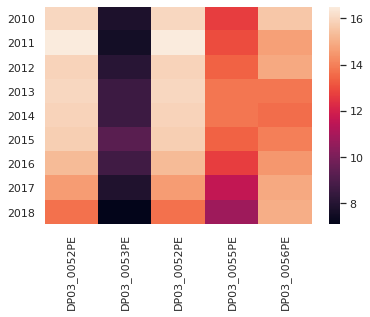

In [48]:
sns.heatmap(income)

In [70]:
eviction = pd.read_csv('eviction lab', index_col=None, header=0)
eviction

,GEOID,name,parent-location,year,population,poverty-rate,pct-renter-occupied,median-gross-rent,median-household-income,median-property-value,...,pct-asian,pct-nh-pi,pct-multiple,pct-other,undefined,evictions,eviction-filings,eviction-rate,eviction-filing-rate,evictions-per-day
0,3457000,Paterson,New Jersey,2000,149222,22.19,68.50,696,32778,137500,...,1.83,0.04,2.87,0.33,0,NaN,NaN,NaN,NaN,NaN
1,3457000,Paterson,New Jersey,2001,149222,22.19,68.50,696,32778,137500,...,1.83,0.04,2.87,0.33,0,773.0,3715.0,2.52,12.10,2.12
2,3457000,Paterson,New Jersey,2002,149222,22.19,68.50,696,32778,137500,...,1.83,0.04,2.87,0.33,0,801.0,3283.0,2.61,10.68,2.19
3,3457000,Paterson,New Jersey,2003,149222,22.19,68.50,696,32778,137500,...,1.83,0.04,2.87,0.33,0,676.0,3094.0,2.19,10.04,1.85
4,3457000,Paterson,New Jersey,2004,149222,22.19,68.50,696,32778,137500,...,1.83,0.04,2.87,0.33,0,173.0,3844.0,0.56,12.46,0.47
5,3457000,Paterson,New Jersey,2005,145744,24.25,68.47,998,33858,332600,...,2.11,0.00,0.46,0.55,0,5.0,5035.0,0.02,16.28,0.01
6,3457000,Paterson,New Jersey,2006,145744,24.25,68.47,998,33858,332600,...,2.11,0.00,0.46,0.55,0,115.0,9023.0,0.37,29.13,0.32
7,3457000,Paterson,New Jersey,2007,145744,24.25,68.47,998,33858,332600,...,2.11,0.00,0.46,0.55,0,84.0,4907.0,0.27,15.81,0.23
8,3457000,Paterson,New Jersey,2008,145744,24.25,68.47,998,33858,332600,...,2.11,0.00,0.46,0.55,0,34.0,5385.0,0.11,17.32,0.09
9,3457000,Paterson,New Jersey,2009,145744,24.25,68.47,998,33858,332600,...,2.11,0.00,0.46,0.55,0,11.0,5044.0,0.04,16.19,0.03


In [71]:
eviction = eviction.iloc[10:17,3:26]
eviction

,year,population,poverty-rate,pct-renter-occupied,median-gross-rent,median-household-income,median-property-value,rent-burden,pct-white,pct-af-am,...,pct-asian,pct-nh-pi,pct-multiple,pct-other,undefined,evictions,eviction-filings,eviction-rate,eviction-filing-rate,evictions-per-day
10,2010,146199,25.24,70.41,1085,33583,302400,40.7,9.18,28.34,...,3.19,0.01,1.20,0.3,0,18.0,5292.0,0.06,16.96,0.05
11,2011,146987,27.12,73.49,1112,32915,246700,41.2,8.56,27.52,...,3.78,0.00,0.74,0.1,0,18.0,5526.0,0.06,17.47,0.05
12,2012,146987,27.12,73.49,1112,32915,246700,41.2,8.56,27.52,...,3.78,0.00,0.74,0.1,0,7.0,5926.0,0.02,18.50,0.02
13,2013,146987,27.12,73.49,1112,32915,246700,41.2,8.56,27.52,...,3.78,0.00,0.74,0.1,0,3.0,6143.0,0.01,18.93,0.01
14,2014,146987,27.12,73.49,1112,32915,246700,41.2,8.56,27.52,...,3.78,0.00,0.74,0.1,0,161.0,6035.0,0.49,18.38,0.44
15,2015,146987,27.12,73.49,1112,32915,246700,41.2,8.56,27.52,...,3.78,0.00,0.74,0.1,0,5.0,6153.0,0.02,18.51,0.01
16,2016,146987,27.12,73.49,1112,32915,246700,41.2,8.56,27.52,...,3.78,0.00,0.74,0.1,0,5.0,6086.0,0.01,18.09,0.01


In [97]:
income = income.iloc[0:7,:]
income

,DP03_0052PE,DP03_0053PE,DP03_0052PE,DP03_0055PE,DP03_0056PE,eviction
2010,16.0,7.8,16.0,12.7,15.6,NaN
2011,16.5,7.6,16.5,13.0,14.7,NaN
2012,15.9,8.1,15.9,13.4,14.9,NaN
2013,16.0,8.6,16.0,13.8,13.8,NaN
2014,15.9,8.6,15.9,13.8,13.6,NaN
2015,15.8,9.3,15.8,13.4,14.0,NaN
2016,15.3,8.7,15.3,12.7,14.5,NaN


In [90]:
e = eviction['eviction-rate'].astype(float)
e

10    0.06
11    0.06
12    0.02
13    0.01
14    0.49
15    0.02
16    0.01
Name: eviction-rate, dtype: float64

In [100]:
ev =  [0.06,0.06,0.02,0.01,0.49,0.02,0.01]

In [102]:
income['eviction'] = ev
income

,DP03_0052PE,DP03_0053PE,DP03_0052PE,DP03_0055PE,DP03_0056PE,eviction
2010,16.0,7.8,16.0,12.7,15.6,0.06
2011,16.5,7.6,16.5,13.0,14.7,0.06
2012,15.9,8.1,15.9,13.4,14.9,0.02
2013,16.0,8.6,16.0,13.8,13.8,0.01
2014,15.9,8.6,15.9,13.8,13.6,0.49
2015,15.8,9.3,15.8,13.4,14.0,0.02
2016,15.3,8.7,15.3,12.7,14.5,0.01
